# MNIST CLASSIFICATION

## Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from config import CONFIG

import sys
sys.path.insert(0, "../src")
sys.path.insert(1, "../../GaussBayes/bayesTheorem/src/")



In [2]:
%load_ext autoreload


In [3]:
%autoreload 2
from helper import mnist_show_me, confusion_matrix
from KNN import *
from GaussNB import *

In [4]:
mnist_train = pd.read_csv(CONFIG.data / "MNIST_train.csv")
print(f"train data:")
display(mnist_train.head())
print(f"data shape: {mnist_train.shape}")

train data:


,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


data shape: (60000, 787)


In [5]:
X_train, y_train = mnist_train.iloc[:, 3:].to_numpy(), mnist_train.iloc[:, 2].to_numpy()
X_train = X_train / 255


In [6]:
mnist_test = pd.read_csv(CONFIG.data / "MNIST_test.csv")
print(f"test data:")
display(mnist_train.head())
print(f"test data shape: {mnist_test.shape}")

test data:


,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


test data shape: (10000, 787)


In [7]:
X_test, y_test = mnist_test.iloc[:, 3:].to_numpy(), mnist_test.iloc[:, 2].to_numpy()
X_test = X_test / 255


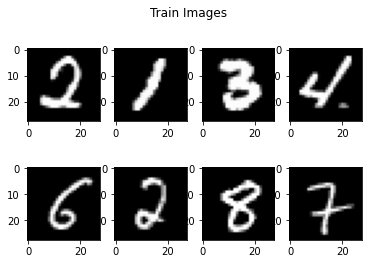

In [8]:
train_indices = np.random.randint(0, len(X_train), 8)
list_of_images = [x.reshape(28, 28) for x in X_train[train_indices]]
mnist_show_me(list_of_images, title="Train Images")


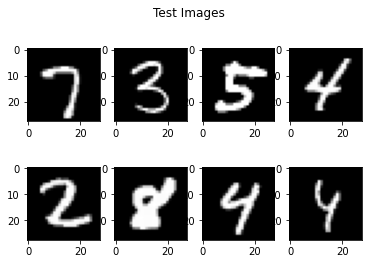

In [9]:
indices = np.random.randint(0, len(X_test), 8)
list_of_test_images = [x.reshape(28, 28) for x in X_test[indices]]
mnist_show_me(list_of_test_images, title="Test Images")

## GAUSSIAN BAYES CLASSIFIER

In [8]:
gauss_clf = GaussBayes()

gauss_clf.fit(X_train, y_train)
gauss_preds = gauss_clf.predict(X_test)

In [9]:
def accuracy(y_test, preds):
    return np.mean(y_test==preds)
print(f"Model's accuracy: {accuracy(y_test, gauss_preds)}")

Model's accuracy: 0.9108


In [10]:
train_preds = gauss_clf.predict(X_train)
accuracy(y_train, train_preds)

0.9306333333333333

In [40]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
acc = []
for train_indices, test_indices in kf.split(X_train):
    xtrain, xtest = X_train[train_indices], X_train[test_indices]
    ytrain, ytest = y_train[train_indices], y_train[test_indices]
    gauss_clf = GaussBayes()
    gauss_clf.fit(xtrain, ytrain)
    preds = gauss_clf.predict(xtest)
    score = accuracy(ytest, preds)
    acc.append(score)
print(f"Model's accuracy: {np.mean(acc):.3f} +/- {np.std(acc)}")

Model's accuracy: 0.905 +/- 0.0027090383697705167


Text(0.5, 1.0, 'Confusion Matrix')

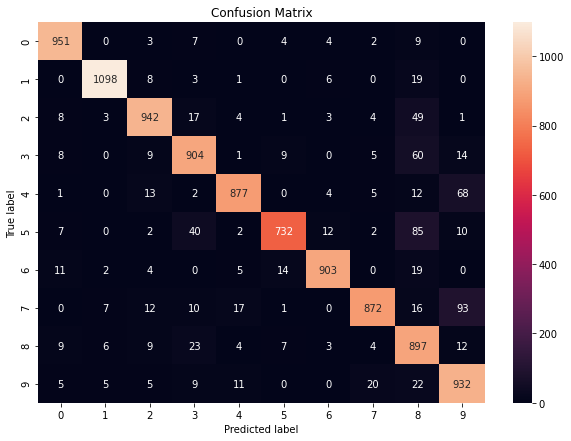

In [43]:
confusion_matrix(y_true=y_test, y_preds=gauss_preds)
plt.title("Confusion Matrix")

## KNN Classifier

In [10]:
import time

In [49]:
knn = KNNClassifier()
knn.fit(X_train, y_train)


In [ ]:
# multi-core knn
start = time.time()
knn.fit(X_train, y_train)
knn_preds = knn.predict_multi(X=X_test, K=3, epsilon=1e-3)
knn_time = time.time() - start
print(f"processing time: {knn_time:.3f}")

In [23]:
np.mean(y_test==knn_preds)

0.9717

Text(0.5, 1.0, 'Confusion Matrix')

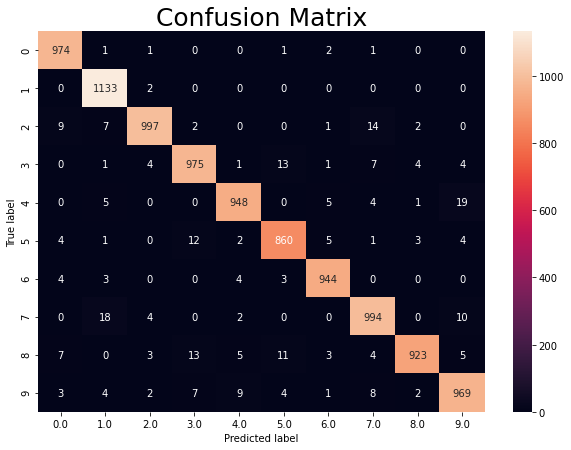

In [26]:
confusion_matrix(y_test, preds)
plt.title("Confusion Matrix", fontsize=25)

In [ ]:
start = time.time()
knnCosim = KNNClassifierCosineSim()
knnCosim.fit(X_train, y_train)
knnCosimPreds = knnCosim.predict(X_test, K=3)
print(f"Processing time {(time.time() - start) / 60}")
print(f"Acc: {np.mean(y_test == knnCosimPreds):.4f}")